In [10]:
%load_ext autoreload
%autoreload 2
from functions import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Test 5: n dimensinal

## Init

In [2]:
SurfaceSourceFile = kds.SurfaceSourceFile("surface_source.mcpl", domain={"w": [0, 1]})
df = SurfaceSourceFile.get_pandas_dataframe()
del SurfaceSourceFile

Number of particles in file surface_source.mcpl: 3514158
100% n, 0% g, 0% e-, 0% e+, 0% p, 


In [3]:
# columns_order = ["x", "y", "ln(E0/E)", "mu", "phi", "wgt"]
columns_order = ["x","y","ln(E0/E)"]
df = df[columns_order]

In [4]:
micro_bins = [150] * len(columns_order)
macro_bins = [100] * len(columns_order)

## Plotting the surface source

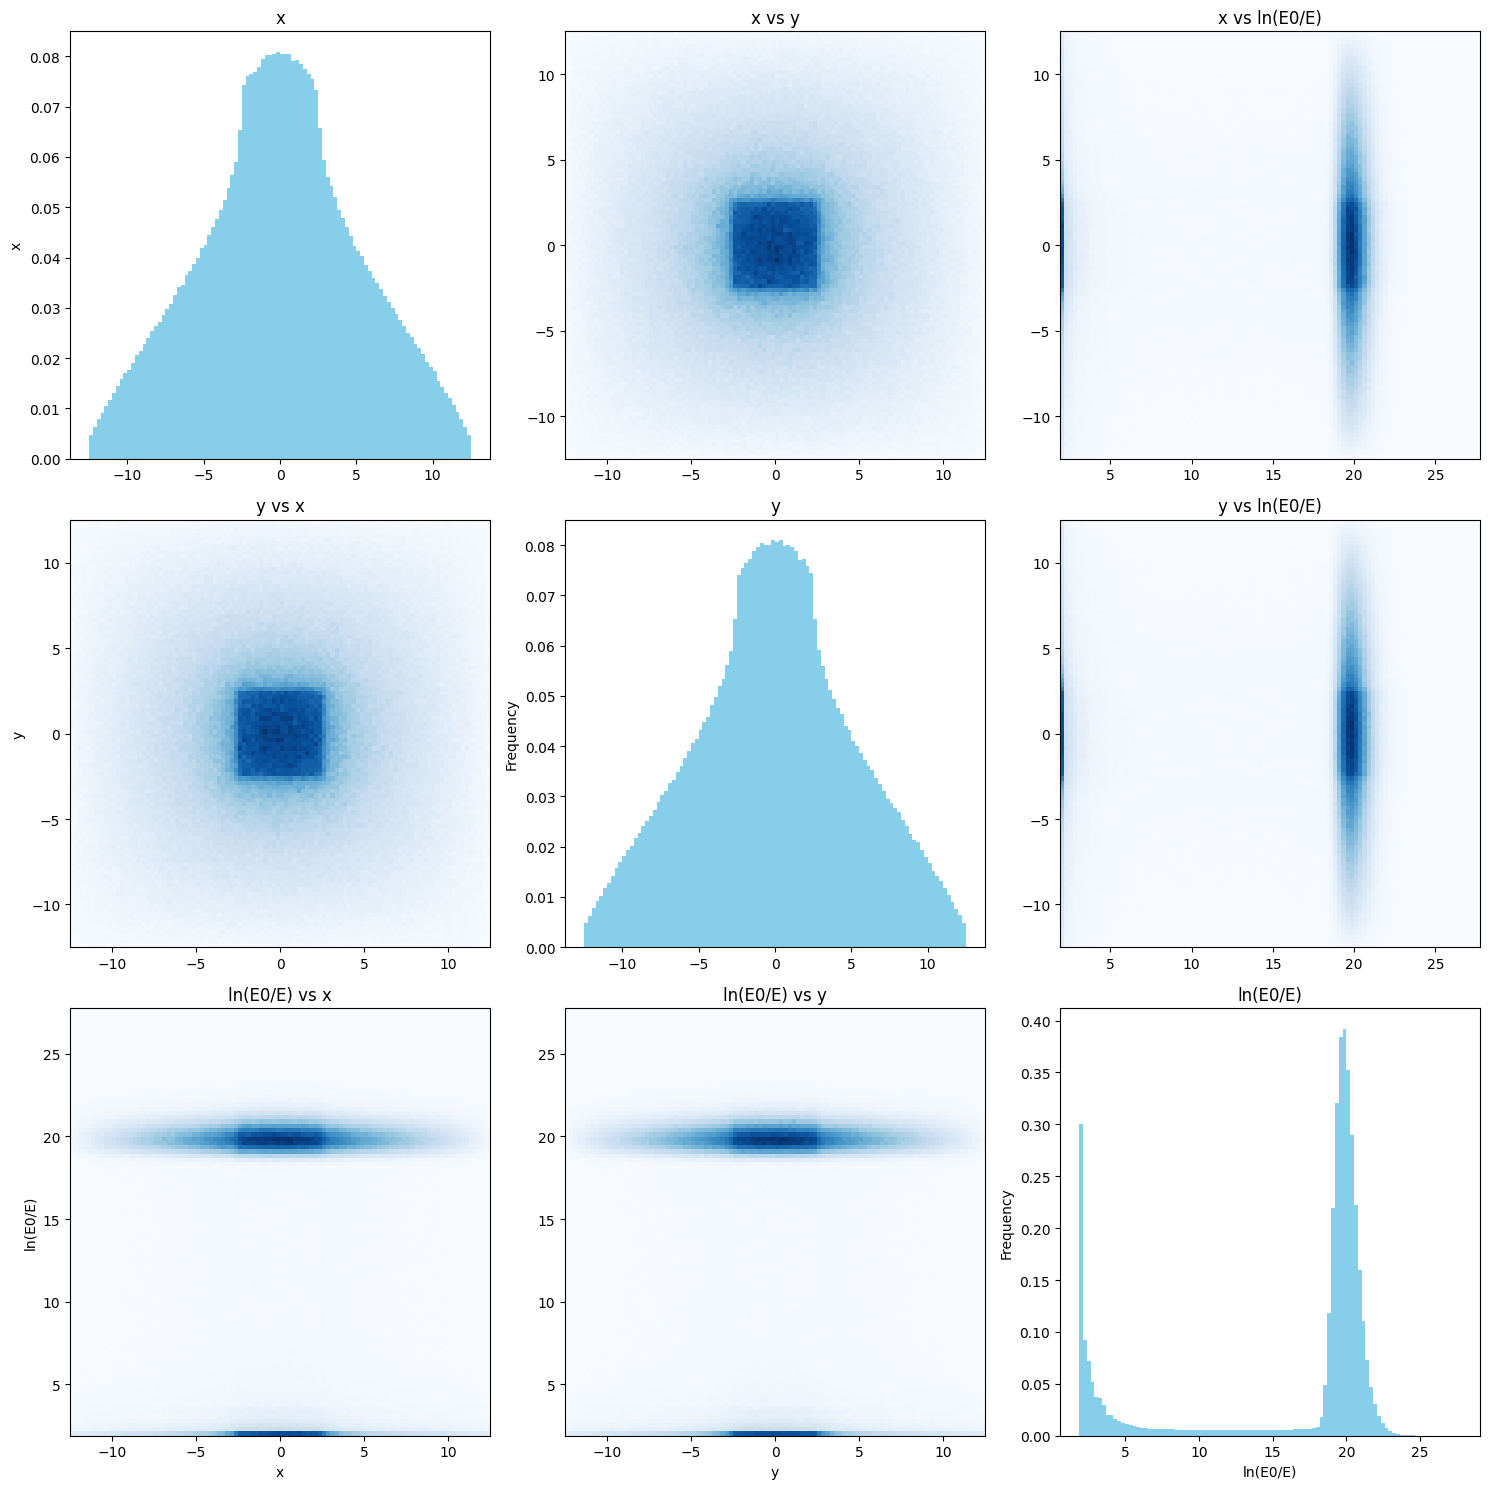

In [5]:
plot_correlated_variables(df, columns_order, bin_size_diagonal=100, bin_size_off_diagonal=100)

## n_dimensional functions to get cumulatives and sample

In [6]:
cumul, micro, macro = recur(df, columns_order, micro_bins, macro_bins)

In [18]:
sampled_df = sample_df(cumul,micro, macro, columns_order,1_000_000)

In [7]:
x_sampled, y_sampled ,u_sampled = sample_3d(cumul[0],micro[0],macro[0],cumul[1],micro[1],macro[1],cumul[2],micro[2],10_000_000)

In [8]:
# make dataframe with sampled values
df_sampled = pd.DataFrame(
    {
        columns_order[0]: x_sampled,
        columns_order[1]: y_sampled,
        columns_order[2]: u_sampled,
    }
)

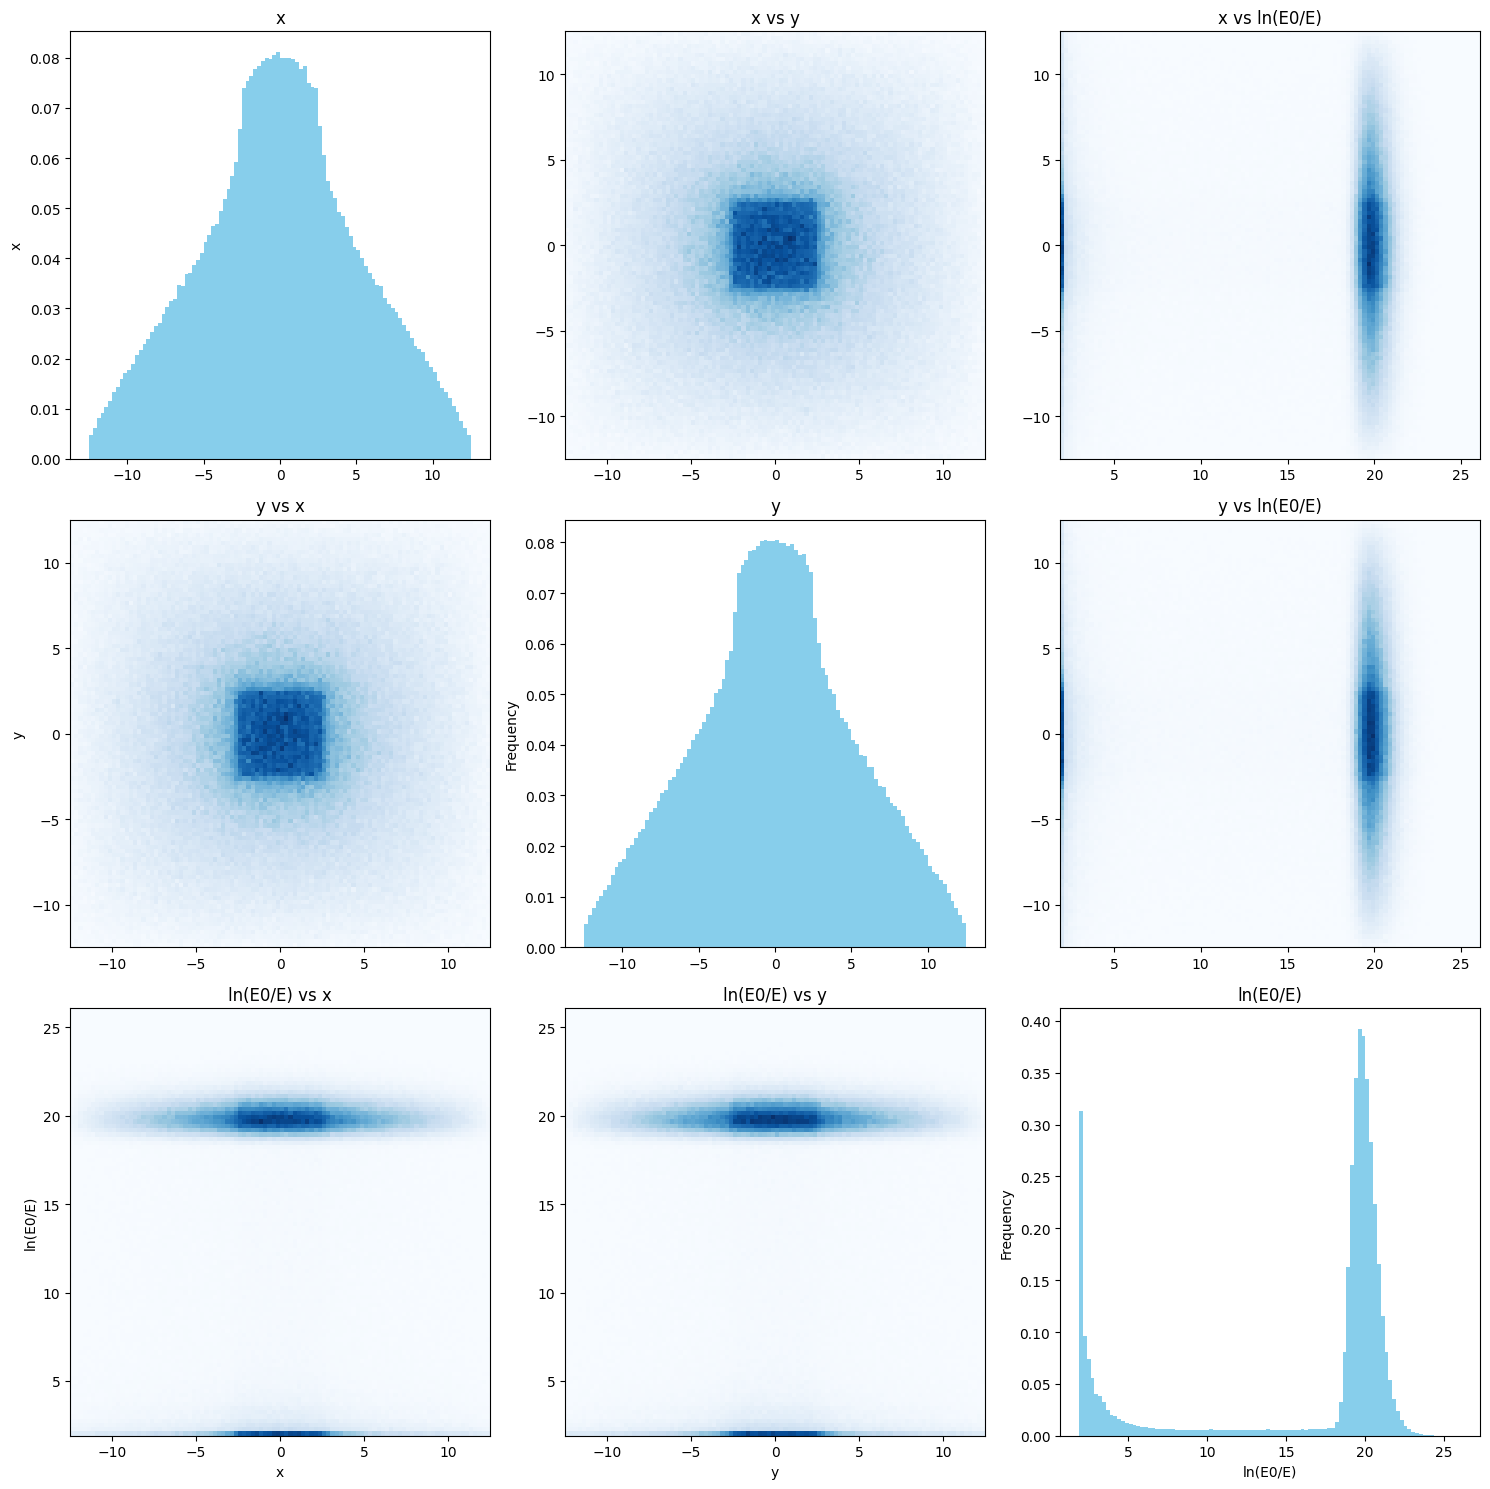

In [9]:
plot_correlated_variables(sampled_df, columns_order)